Visualize Progress of Embedding on Validation set over the training process

Classification use validate as training set and test as test

Use Supervised learning on extracted vectors 
k-NN or simple NN

User Unsupervised learning on extracted vectors
hierarchical clustering or AE

Which classes are most confounded? Is there a pattern to it? How is it reflected in the visualizations?
Show some MisIDed examples

In [43]:
import glob
import os 
os.chdir("plankton_siamese")
import testing as t
from keras.models import load_model
glob.glob("test/*")

### Testing triplet_generator ###
0 a: (4, 299, 299, 3) p: (4, 299, 299, 3) n: (4, 299, 299, 3) y: (4, 2)
1 a: (4, 299, 299, 3) p: (4, 299, 299, 3) n: (4, 299, 299, 3) y: (4, 2)
2 a: (4, 299, 299, 3) p: (4, 299, 299, 3) n: (4, 299, 299, 3) y: (4, 2)
3 a: (4, 299, 299, 3) p: (4, 299, 299, 3) n: (4, 299, 299, 3) y: (4, 2)


Using TensorFlow backend.


['test/Brachyura', 'test/Bivalvia__Mollusca', 'test/Annelida']

In [44]:
# Convert Dict of vectors into array
model = load_model("models/epoch_1.model")
image_vectors = t.get_vectors(model, tdir = "validate/")
vecs = np.zeros((1,64))
y_truth = []
conv_dict = {}
keys = list(image_vectors.keys())
for i in range(len(keys)):
    conv_dict[keys[i]] = i
for c in image_vectors:
    print(c)
    vecs = np.append(vecs,np.array(image_vectors[c]).reshape(100,64), axis = 0)
    y_truth.append([c]*100)
vecs = np.delete(vecs,0,0)
y_truth = [item for sublist in y_truth for item in sublist]

/home/florianmuthreich/.local/lib/python3.5/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


3

In [110]:
models = glob.glob('models/*')
vec_hist = []
for m in models:
    model = load_model(m) # Switch to load weights
    image_vectors = t.get_vectors(model, tdir = imdir)
    # Begin fn for dict to array convert
    vecs = np.zeros((1,64))
    y_truth = []
    con_dict = {}
    keys = list(image_vectors.keys())
    for i in range(len(keys)):
        conv_dict[keys[i]] = i
    for c in image_vectors:
        print(c)
        vecs = np.append(vecs,np.array(image_vectors[c]).reshape(100,64), axis = 0)
        y_truth.append([c]*100)
    # End fn dict to array
    
    # T-SNE for Visualization
    
    vec_hist.append(np.delete(vecs,0,0))
    y_truth = [item for sublist in y_truth for item in sublist]
        

In [113]:
len(vec_hist)

0

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2

In [47]:
pca_5 = PCA(n_components=5)
pca_result_5 = pca_5.fit_transform(vecs)
print('Cumulative explained variation for 5 principal components: {}'.format(np.sum(pca_5.explained_variance_ratio_)))
print(np.shape(pca_result_5))

    
tsne = TSNE(n_components=2, verbose=1, n_iter=3000)
tsne_result = tsne.fit_transform(pca_result_5)

Cumulative explained variation for 5 principal components: 0.9987155621976924
(300, 5)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 0.034451
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.678051
[t-SNE] KL divergence after 3000 iterations: 0.140168


In [95]:
tsne_result = tsne.fit_transform(vecs)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.001s...
[t-SNE] Computed neighbors for 300 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 0.043784
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.020187
[t-SNE] KL divergence after 3000 iterations: 0.200395


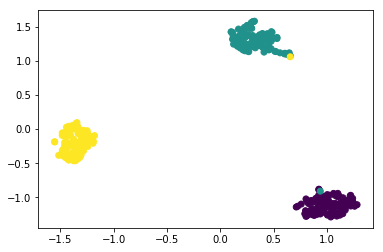

In [96]:
plt.scatter(tsne_result_scaled[:,0], tsne_result_scaled[:,1], c = [conv_dict[i] for i in y_truth])

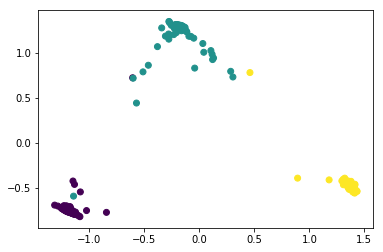

In [94]:
plt.scatter(pca_result_5[:,0], pca_result_5[:,1], c = [conv_dict[i] for i in y_truth])

In [56]:
zip(tsne_result_scaled[:,0], tsne_result_scaled[:,1])

In [75]:
tmp = tsne_result_scaled[:,0:2].reshape(1,300,2)
res = np.append(tmp, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)


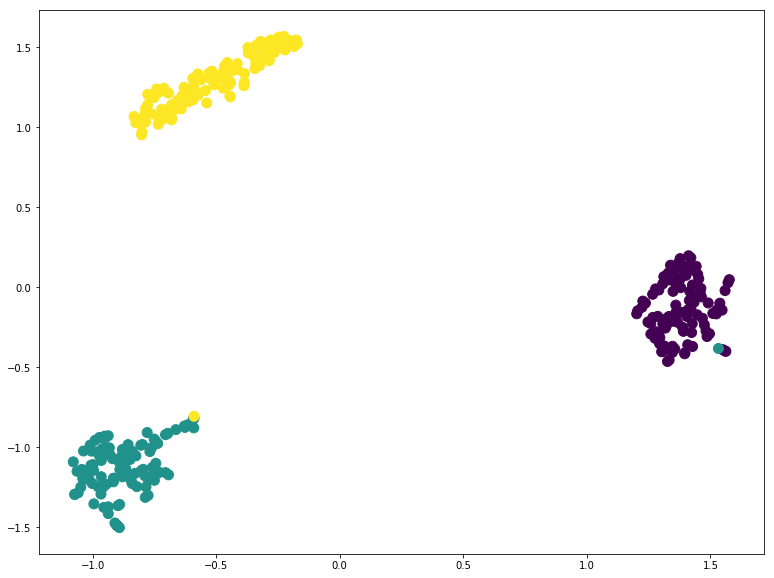

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

def main(res):
    numframes = res.shape[0]
    color_data = [conv_dict[i] for i in y_truth]
    xy_data = res

    fig = plt.figure(figsize=(13, 10))
    scat = plt.scatter(res[0,:,0], res[0,:,1], c=color_data, s=100)

    ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                                  fargs=(scat, xy_data))

    return(ani)

def update_plot(i, scat, xy):
    scat.set_offsets(xy[i])
    return scat,

ani = main(res = res)
HTML(ani.to_html5_video())

In [84]:
from testing import centroid
from testing import knn_test
#centroid(image_vectors['Annelida'])
knn_test(model, "validate", "test", k=5)


14

In [46]:
def move_and_split_data_set(path):
    import glob
    import re
    import os
    from random import shuffle
    import shutil
    classes = glob.glob(path + "*")
    classes = [re.search(path + "(.*)", classes[i]).group(1) for i in range(len(classes))]
    folders = ["test", "validate", "train"]
    for i in folders:
        if i in classes: classes.remove(i)
    print("Number of classes: ",len(classes))
    for i in folders:
        print("Creating ",i,"-set")
        if not os.path.isdir(path + i):
            os.mkdir(path + i)
            
        for c in classes:
            print("Moving files: ", c)
            if not os.path.isdir(path + i + "/" + c):
                os.mkdir(path + i + "/" + c)
            files = glob.glob(path + c + "/*")
            shuffle(files)
            if i == "train":
                for f in files:
                    #print("")
                    shutil.move(f, path + i + "/" + c + re.search("/"+c+"(.*)", f).group(1) )
                    # end for files
            else:
                for f in files[0:10]:
                    #print(f,"___", path + i + "/" + c + re.search("/"+c+"(.*)", f).group(1))
                    shutil.move(f, path + i + "/" + c + re.search("/"+c+"(.*)", f).group(1) )
                    #end for files
    print("Removing Old class folders")
    for c in classes:
        os.rmdir(path + c)
    return classes

#fetch_data_set("Ex3/plankton_siamese/Euc/")

In [47]:
classes = fetch_data_set("plankton_siamese/data/Euc/")

In [45]:
l = ["c","a","d","b"]
for i in ["a","b"]:
    if i in l: l.remove(i) 
l

['c', 'd']